In [ ]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd


# **Часть первая: Знакомство с Pandas.#**
Прочитайте данные с помощью метода read_html из таблицы "Коефіцієнт народжуваності в регіонах України (1950—2019)" по ссылке

Необходимо выполнить:

**1. Вывести первые строки таблицы с помощью метода head**

In [ ]:
tbl = pd.read_html("https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C", match='Коефіцієнт народжуваності в регіонах України')
table_wiki = tbl[0]
table_wiki.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,—,—
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111,71
4,Донецька,271.0,214.0,140.0,109,61,98,82,—


**2. Определите количество строк и столбцов в датафрейме (атрибут shape)**

In [ ]:
table_wiki.shape

(28, 9)

**3. Замените в таблице значения "—" на значения NaN**

In [ ]:
table_wiki = table_wiki.replace('—', 'NaN')
table_wiki

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,NaN,NaN
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111,71
4,Донецька,271.0,214.0,140.0,109,61,98,82,NaN
5,Житомирська,261.0,223.0,159.0,129,89,122,120,79
6,Закарпатська,314.0,273.0,207.0,168,115,151,146,104
7,Запорізька,219.0,197.0,150.0,124,71,106,106,68
8,Івано-Франківська,243.0,248.0,182.0,155,103,124,122,88
9,Київська,204.0,189.0,156.0,123,73,122,121,80


**4. Определите типы всех столбцов с помощью dataframe.dtypes**

In [ ]:
table_wiki.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object

**5.Замените типы не числовых колонок на числовые. Подсказка - это колонки где находился символ "—"**

In [ ]:
table_wiki['2014'] = pd.to_numeric(table_wiki['2014'], errors='coerce')
table_wiki['2019'] = pd.to_numeric(table_wiki['2019'], errors='coerce')
table_wiki.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014      float64
2019      float64
dtype: object

**6.Посчитайте, какая доля пропусков содержится в каждой колонке (используйте методы isnull и sum)**

In [ ]:
table_isnull = table_wiki.isnull()
table_isnull.sum()

Регіон    0
1950      2
1960      1
1970      1
1990      0
2000      0
2012      0
2014      2
2019      4
dtype: int64

**7.Удалите из таблицы данные по всей стране, последняя строчка таблицы**

In [ ]:
table_drop = table_wiki.drop([27], axis=0)
table_drop

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,NaN,NaN
1,Вінницька,224.0,192.0,142.0,124,84,112,109.0,76.0
2,Волинська,247.0,250.0,179.0,153,112,148,141.0,101.0
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111.0,71.0
4,Донецька,271.0,214.0,140.0,109,61,98,82.0,NaN
5,Житомирська,261.0,223.0,159.0,129,89,122,120.0,79.0
6,Закарпатська,314.0,273.0,207.0,168,115,151,146.0,104.0
7,Запорізька,219.0,197.0,150.0,124,71,106,106.0,68.0
8,Івано-Франківська,243.0,248.0,182.0,155,103,124,122.0,88.0
9,Київська,204.0,189.0,156.0,123,73,122,121.0,80.0


**8.Замените отсутствующие данные в столбцах средними значениями по этим столбцам (метод fillna)**

In [ ]:
series8 = table_wiki['Регіон']
table8 = table_wiki.drop(['Регіон'], axis=1)
for i in range(table_wiki.shape[0]):
  table8.iloc[i] = table8.iloc[i].fillna(table8.iloc[i].mean())
table8.insert(0, "Регіон", series8)
table8

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.000000,206.0,160.0,130,73,126,154.166667,154.166667
1,Вінницька,224.000000,192.0,142.0,124,84,112,109.000000,76.000000
2,Волинська,247.000000,250.0,179.0,153,112,148,141.000000,101.000000
3,Дніпропетровська,204.000000,204.0,151.0,123,71,112,111.000000,71.000000
4,Донецька,271.000000,214.0,140.0,109,61,98,82.000000,139.285714
5,Житомирська,261.000000,223.0,159.0,129,89,122,120.000000,79.000000
6,Закарпатська,314.000000,273.0,207.0,168,115,151,146.000000,104.000000
7,Запорізька,219.000000,197.0,150.0,124,71,106,106.000000,68.000000
8,Івано-Франківська,243.000000,248.0,182.0,155,103,124,122.000000,88.000000
9,Київська,204.000000,189.0,156.0,123,73,122,121.000000,80.000000


**9.Получите список регионов, где уровень рождаемости в 2019 году был выше среднего по Украине**

In [ ]:
table8['2019'][table8['2019']>table_wiki['2019'][27]]

0     154.166667
2     101.000000
4     139.285714
6     104.000000
8      88.000000
11    138.000000
12     87.000000
14     88.000000
16    107.000000
23     92.000000
25    110.000000
26    105.000000
Name: 2019, dtype: float64

**10.В каком регионе была самая высокая рождаемость в 2014 году?**

In [ ]:
table8['Регіон'].iloc[table8['2014'].argmax()]

'Крим'

**11.Постройте столбцовую диаграмму рождаемости по регионам в 2019 году**

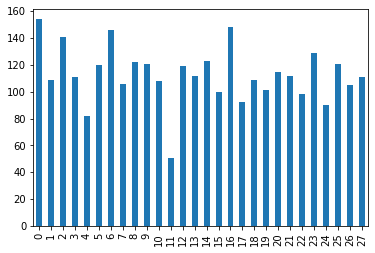

In [ ]:
import matplotlib.pyplot as plt

table8['2014'].plot(kind='bar', x=table8['Регіон'])
plt.show()